In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
# Image parameters
image_height = 512
image_width = image_height
cmap = "gray"

In [3]:
# Gaussian filter params
gaussian_filter_sigma = 10

In [4]:
xx, yy = np.mgrid[:image_height, :image_width]
center_x = image_width/2
center_y = image_height/2
radius = 0.25 * (image_width + image_height)/2
disk = (xx - center_x) ** 2 + (yy - center_y) ** 2 < radius**2
disk = 1 * disk

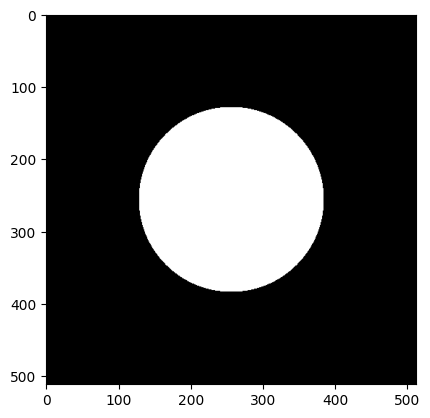

In [5]:
plt.imshow(disk, cmap=cmap)

In [6]:
gaussian_filtered_image = sp.ndimage.gaussian_filter(disk, sigma=gaussian_filter_sigma)

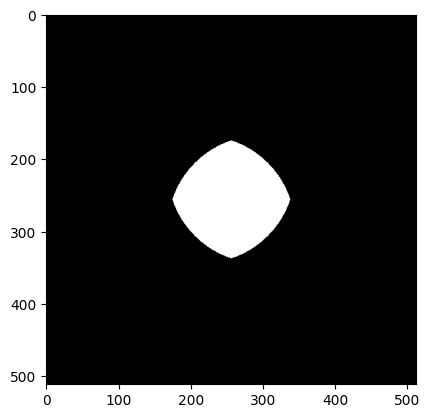

In [7]:
plt.imshow(gaussian_filtered_image, cmap=cmap)

In [8]:
def butter_lowpass(highcut, fs, order=5):
    nyq = 0.5 * fs
    high = highcut / nyq
    sos = sp.signal.butter(order, high, analog=False, btype='low', output='sos')
    return sos

def butter_lowpass_filter(data, highcut, fs, order=5):
    sos = butter_lowpass(highcut, fs, order=order)
    y = sp.signal.sosfiltfilt(sos, data)
    return y

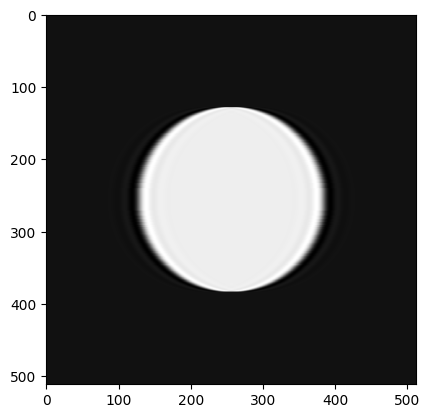

In [9]:
butter_filtered_image = butter_lowpass_filter(disk, 500, 10000)
plt.imshow(butter_filtered_image, cmap=cmap)

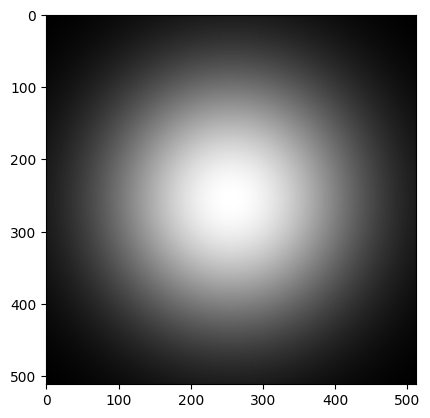

In [17]:
gaussian_image_sigma = 125
gaussian_image = np.exp(-((xx - center_x) ** 2 + (yy - center_y) ** 2)/(2 * gaussian_image_sigma ** 2))/np.sqrt((2 * np.pi * gaussian_image_sigma ** 2) ** 2)
plt.imshow(gaussian_image, cmap=cmap)

Note: defining the X-ray transform to be:
$$
P[f](n,t) = \int_{\mathbb{R}} f(t+an)da, \ n \in \mathbb{S}^{n-1}, \ t \in n^\perp
$$
we can compute that when $g(x) = \frac{1}{(2\pi\sigma^2)^{\frac{d}{2}}}\exp\left(-\frac{||x||_2^2}{2\sigma^2}\right)$, ie $g = f_Z$ where $Z \sim \mathcal{N}_d\left(0, \sigma^2 \text{I}_d\right)$,
$$
P[g](n,t) = g(t) = \frac{1}{(2\pi\sigma^2)^{\frac{d-1}{2}}}\exp\left(-\frac{||t||_2^2}{2\sigma^2}\right)
$$
which is radially symmetric. Now define $g_q(x) = g(x-\Delta_q)$, we similarly obtain that:
$$
P[g_q](n,t) = \frac{1}{(2\pi \sigma^2)^{\frac{d-1}{2}}}\exp\left(-\frac{1}{2\sigma^2}\left(||t-\Delta_q||_2^2 + \langle n,\Delta_q \rangle^2\right)\right)
$$
Also notice that:
- $g$ is essentially bandlimited.
- For $d=2$: $R[g](n,s) = P[g](n^\perp,sn) = g(sn) = \frac{1}{(2\pi\sigma^2)^{\frac{1}{2}}}\exp\left(-\frac{|s|^2}{2\sigma^2}\right)$ where $n \in \mathbb{S}^1$ and $s \in \mathbb{R}$.

Since $R[g]$ does not depend on $n$, we plot it for values of $s$:

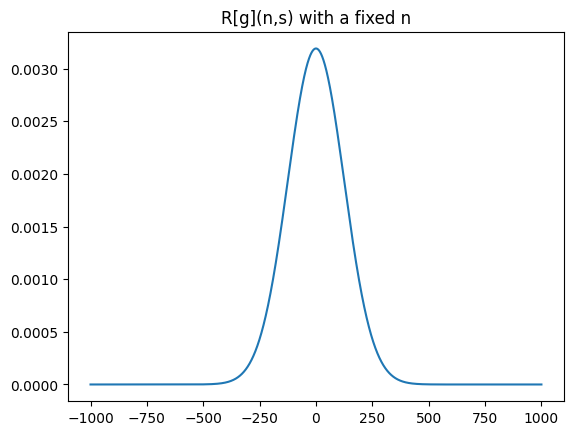

In [26]:
lower_lim_s = -1000
upper_lim_s = 1000
num_plot_samples = 20000
x = np.linspace(lower_lim_s, upper_lim_s, num=num_plot_samples)
plt.plot(x, np.exp(-(x ** 2)/(2 * gaussian_image_sigma ** 2))/np.sqrt(2 * np.pi * gaussian_image_sigma ** 2))
plt.title(label="R[g](n,s) with a fixed n");


With the following convention for the Fourier transform:
$$
\mathcal{F}_d(f)(v) = \int_{\mathbb{R}^d} f(x) \exp(-j2\pi \langle v, x \rangle)dx
$$
we have that:
$$
\mathcal{F}_d(g)(v) = \exp\left(-2(\pi \sigma)^2 ||v||_2^2\right)
$$
Thus, by the Fourier Slice theorem, for $d=2$:
$$
\mathcal{F}_1(R[g](n, .))(\alpha) = \mathcal{F}_2(g)(\alpha n) = \exp\left(-2(\pi \sigma)^2 ||\alpha n||_2^2\right) = \exp\left(-2(\pi \sigma)^2 |\alpha|^2\right), \ n \in \mathbb{S}^1,\ \alpha \in \mathbb{R}
$$